<a href="https://colab.research.google.com/github/chaves08r/House-price/blob/main/house_price1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports <a id="imports"></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "jpso0907"
os.environ['KAGGLE_KEY'] = "3ec703ca5503f4f9e20de4fe23482a8b"

!kaggle competitions download -c home-data-for-ml-course

  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 214MB/s]


In [2]:
!unzip home-data-for-ml-course.zip

Archive:  home-data-for-ml-course.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.gz  
  inflating: test.csv                
  inflating: test.csv.gz             
  inflating: train.csv               
  inflating: train.csv.gz            


In [3]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Visualizar os dados
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Importa a biblioteca numpy, usada para manipulação de arrays e operações numéricas.
import numpy as np

# Importa a biblioteca pyplot do matplotlib, usada para criar gráficos.
from matplotlib import pyplot as plt

# Importa a biblioteca seaborn, que é uma extensão do matplotlib para criar gráficos mais atraentes e informativos.
import seaborn as sns

# Função para dividir os dados em treino, validação e teste
from sklearn.model_selection import train_test_split


# Importa a biblioteca de warnings para controlar a exibição de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apareçam no terminal durante a execução do código.
warnings.filterwarnings("ignore")


## Dados gerais

O conjunto de dados apresenta 81 variáveis explicativas que detalham quase todos os aspectos de imóveis residenciais localizados em Ames, Iowa. Essas variáveis abrangem características estruturais, qualidade de construção, localização, comodidades e condições de venda das propriedades. O objetivo da análise é prever o preço final de venda de cada imóvel (SalePrice), com base nesses atributos.

acesse os dados aqui: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [5]:
# Criação do dicionário simplificado com dupla descrição (breve e detalhada)
dictionary = {
    "SalePrice": ("Preço de venda do imóvel.", "Valor de venda em dólares — variável alvo da predição."),
    "MSSubClass": ("Classe do edifício.", "Identifica o tipo de habitação envolvida na venda."),
    "MSZoning": ("Zoneamento do imóvel.", "Classificação geral de zoneamento urbano."),
    "LotFrontage": ("Frente do lote.", "Metros lineares de rua conectados à propriedade."),
    "LotArea": ("Área do lote.", "Tamanho total do terreno em pés quadrados."),
    "Street": ("Tipo de rua.", "Tipo de acesso à via pública."),
    "Alley": ("Tipo de viela.", "Tipo de acesso por viela — se houver."),
    "LotShape": ("Formato do lote.", "Forma geral do terreno (regular, irregular, etc.)."),
    "LandContour": ("Topografia do terreno.", "Nível de planicidade do terreno."),
    "Utilities": ("Infraestrutura básica.", "Tipo de utilidades disponíveis (água, eletricidade, etc.).")
}

# Criação do DataFrame
dict_df = pd.DataFrame(dictionary.items(), columns=["Variável", "Info"])

# Separar descrição e categoria
dict_df["Descrição"] = dict_df["Info"].apply(lambda x: x[0])
dict_df["Categorias"] = dict_df["Info"].apply(lambda x: x[1])

# Determinar o tipo de variável
numericas = ["SalePrice", "LotFrontage", "LotArea"]
dict_df["Tipo"] = dict_df["Variável"].apply(lambda x: "Numérica" if x in numericas else "Categórica")

# Remover coluna auxiliar
dict_df.drop(columns=["Info"], inplace=True)


In [6]:
display(dict_df)

,Variável,Descrição,Categorias,Tipo
0,SalePrice,Preço de venda do imóvel.,Valor de venda em dólares — variável alvo da p...,Numérica
1,MSSubClass,Classe do edifício.,Identifica o tipo de habitação envolvida na ve...,Categórica
2,MSZoning,Zoneamento do imóvel.,Classificação geral de zoneamento urbano.,Categórica
3,LotFrontage,Frente do lote.,Metros lineares de rua conectados à propriedade.,Numérica
4,LotArea,Área do lote.,Tamanho total do terreno em pés quadrados.,Numérica
5,Street,Tipo de rua.,Tipo de acesso à via pública.,Categórica
6,Alley,Tipo de viela.,Tipo de acesso por viela — se houver.,Categórica
7,LotShape,Formato do lote.,"Forma geral do terreno (regular, irregular, et...",Categórica
8,LandContour,Topografia do terreno.,Nível de planicidade do terreno.,Categórica
9,Utilities,Infraestrutura básica.,"Tipo de utilidades disponíveis (água, eletrici...",Categórica


In [7]:
# Lista de nomes das colunas
columns = ["LotArea",
"GrLivArea",
"FullBath",
"HalfBath",
"YearBuilt",
"YearRemodAdd",
"OverallQual",
"OverallCond",
"KitchenQual",
"BsmtQual",
"Neighborhood",
"MSZoning",
"Condition1",
"SaleType",
"SaleCondition",
"YrSold",
"MoSold",
"SalePrice"
]

# Ler os dados a partir do arquivo train.csv
df = pd.read_csv('train.csv', usecols=columns)

# Exibir as 3 primeiras linhas do DataFrame para verificar a estrutura dos dados
display(df.head(3))

,MSZoning,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,GrLivArea,FullBath,HalfBath,KitchenQual,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,8450,CollgCr,Norm,7,5,2003,2003,Gd,1710,2,1,Gd,2,2008,WD,Normal,208500
1,RL,9600,Veenker,Feedr,6,8,1976,1976,Gd,1262,2,0,TA,5,2007,WD,Normal,181500
2,RL,11250,CollgCr,Norm,7,5,2001,2002,Gd,1786,2,1,Gd,9,2008,WD,Normal,223500


In [8]:
#informações gerais da base
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Tratamento

In [9]:
#retornando o shape da base
train_data.shape

(1460, 81)

In [10]:
# verifica linhas duplicadas

df.duplicated().sum()

np.int64(0)

In [11]:
#visualizando a quantidade valores vazios, listando as colunas e as 20 primeiras linhas
train_data.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [12]:
#percentual de valores vazios
(train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False).head(20)

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageQual,5.547945
GarageFinish,5.547945
GarageType,5.547945


In [13]:
#eliminando colunas com + de 10% de valores vazios
eliminar = train_data.columns[(train_data.isnull().sum() / train_data.shape[0]) > 0.1]

eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [14]:
train_data = train_data.drop(eliminar, axis=1)

Nesse primeiro modelo foi eliminado as colunas de texto, tratou-se os valores vazios e utilizou-se alguns algoritmos para testar e avaliar possiveis erros.

In [15]:
(train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False).head(20)

,0
GarageYrBlt,5.547945
GarageQual,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945
BsmtFinType2,2.602740
BsmtExposure,2.602740
BsmtQual,2.534247
BsmtCond,2.534247
BsmtFinType1,2.534247


In [16]:
#colunas com valores númericos
colunas = train_data.columns[train_data.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
train_data2 = train_data.loc[:,colunas]
train_data2.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
train_data2.isnull().sum().sort_values(ascending=False).head(3)

,0
GarageYrBlt,81
MasVnrArea,8
LotArea,0


In [19]:
#substituindo valores vazios por -1
train_data2 = train_data2.fillna(-1)

In [20]:
train_data2

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


Modelos

separação de base de treino e teste:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
# determinação de x e y

x = train_data2.drop('SalePrice', axis=1)
y = train_data2.SalePrice

In [22]:
#import train test split
from sklearn.model_selection import train_test_split

In [23]:
#separação da base de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Algoritmos utilizados:

Regressão Linear -
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



*   A regressão linear é um modelo matemático simples e poderoso usado para prever um valor com base em outro. Em outras palavras, ela tenta encontrar uma linha reta que melhor se ajusta aos dados e mostra como uma variável influencia outra



Árvore de Regressão -
https://scikit-learn.org/stable/modules/tree.html#regression

* Uma árvore de regressão é um modelo de machine learning que toma decisões em forma de “árvore” para prever valores numéricos (como o preço de uma casa). Ela funciona dividindo os dados em grupos menores e mais homogêneos, passo a passo, até chegar a uma previsão.

KNeighborsRegressor -
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

* O KNeighborsRegressor é um modelo de machine learning baseado em vizinhos mais próximos usado para fazer previsões numéricas (regressão). Ele é uma versão do algoritmo KNN (K-Nearest Neighbors) aplicada à regressão.

In [24]:
#importando a regressão linear
from sklearn.linear_model import LinearRegression

In [25]:
# Criando o regressor e fazendo o fit com os dados de treinoreg_rl = LinearRegression().fit(x_train, y_train)
reg_rl = LinearRegression().fit(x_train, y_train)


In [26]:
#previsão comos dados de teste
y_rl = reg_rl.predict(x_test)

In [27]:
#importando arvore de regressão
from sklearn import tree


In [65]:
# criando o regressor e fazendo fit com os dados de treino
reg_arv = tree.DecisionTreeRegressor(random_state=42).fit(x_train, y_train)

In [66]:
#previsão
y_ar = reg_arv.predict(x_test)

In [30]:
#importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [31]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(x_train, y_train)

In [32]:
#previsão
y_knn = reg_knn.predict(x_test)

Utilizando tanto o erro absoluto quanto o quadrático:
Erro médio absoluto -
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

* O Erro Médio Absoluto (ou MAE – Mean Absolute Error, em inglês) é uma métrica usada para medir o quão erradas estão as previsões de um modelo em relação aos valores reais. Ele calcula a média das diferenças absolutas entre os valores previstos e os valores reais.

Erro quadrático médio -
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

* O EQM mede a diferença entre os valores reais e os valores previstos por um modelo. Ele calcula o quadrado dessa diferença (para não cancelar erros positivos e negativos) e tira a média de todos esses quadrados.

In [33]:
#importando o erro médio absoluto

from sklearn.metrics import mean_absolute_error

In [34]:
#import erro quadratico médio
from sklearn.metrics import mean_squared_error

In [35]:
#avaliando erro na regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

22764.026236544112
1197736462.2396336


In [36]:
#avaliando arvore de decisao
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27420.577625570775
1753168141.2123287


In [37]:
#avaliando knn
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

32618.238584474886
2489885345.465183


plotando visualmente a relação do y_test com as previsões feitas


Text(0, 0.5, 'Previsto')

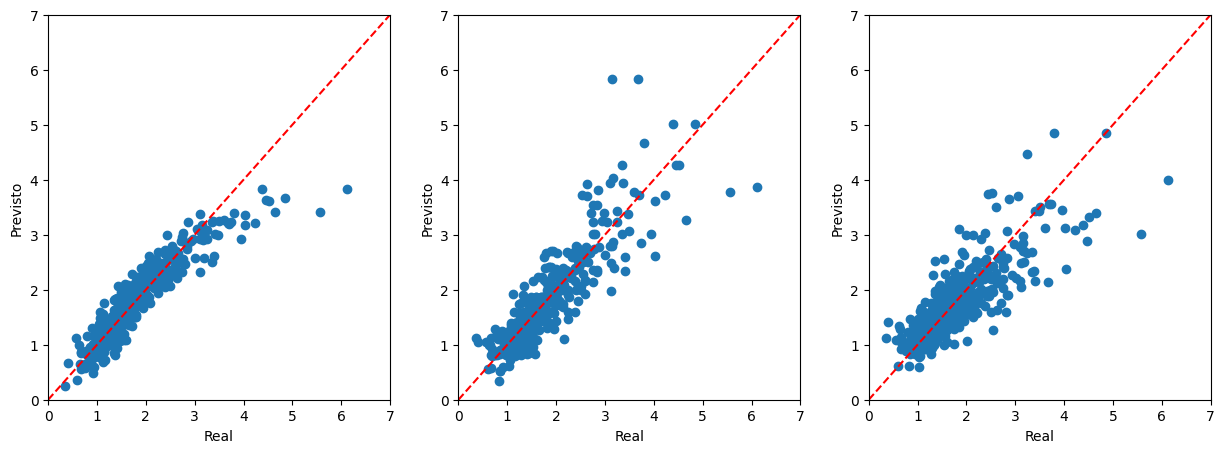

In [38]:
#Criação  do gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000], [0,700000], '--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000], [0,700000], '--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000], [0,700000], '--r')

ax[0].set(xlim=(0, 7), ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsto')
ax[1].set(xlim=(0, 7), ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsto')
ax[2].set(xlim=(0, 7), ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsto')

utilizando a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos

## Fazendo a previsão para a base de teste da competição


retirou-se os valores vazios pois a regressão linear não vai conseguir trabalhar com valores vazio
Se tentarmos usar essa base, ele vai retornar um erro dizendo que o input possui valores NaN
Podemos apenas substituir por -1 como fizemos acima

In [39]:
#importando base de teste
teste = pd.read_csv('test.csv')

In [40]:
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [41]:
#limapndo colunas da base de treino
teste = teste.drop(eliminar, axis =1)

In [42]:
 #verificando colunas numericas
coluna2 = teste.columns[teste.dtypes != 'object']
coluna2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [43]:
#mantendo apenas colunas numericas
teste = teste.loc[:,coluna2]

In [44]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [45]:
#visualizando valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

,0
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
GarageCars,1
GarageArea,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFinSF1,1


In [46]:
#substituindo valores vazios por -1
teste = teste.fillna(-1)

In [47]:
#previsao - regressao linear
y_pred = reg_rl.predict(teste)

In [48]:
#adicionando a coluna de previsao na base
teste['SalePrice'] = y_pred

In [49]:
#extração de id e saleprice
resultado = teste[['Id','SalePrice']]
resultado.head(3)

,Id,SalePrice
0,1461,116408.261612
1,1462,125987.292978
2,1463,171859.023710


In [50]:
resultado.to_csv('submission.csv', index=False)

## Visualizações

Text(0.5, 1.0, 'Área construída vs Preço de venda')

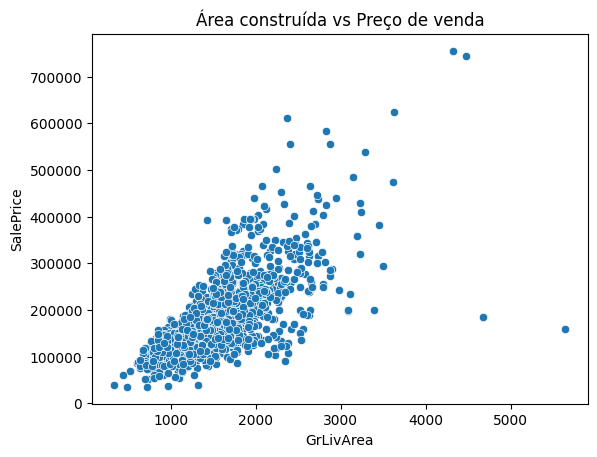

In [51]:
#Quanto maior a área construída acima do solo, maior o preço de venda?
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('Área construída vs Preço de venda')


O gráfico acima mostra uma relação positiva entre o tamanho das casas (medido por `GrLivArea`) e seus respectivos preços (`SalePrice`). Observa-se que, de forma geral, quanto maior a área construída, maior tende a ser o valor de venda, indicando que o tamanho do imóvel é um fator importante na precificação. A maior concentração de pontos se dá entre 1.000 e 2.500 pés quadrados e entre 100.000 e 300.000 dólares, refletindo o perfil mais comum das casas analisadas. Apesar disso, existem alguns outliers, casas muito grandes ou muito caras, que se destacam e podem influenciar a performance de modelos preditivos, sendo recomendável analisá-los separadamente.

<Axes: title={'center': 'Área construída vs Preço de venda (com linha de tendência)'}, xlabel='GrLivArea', ylabel='SalePrice'>

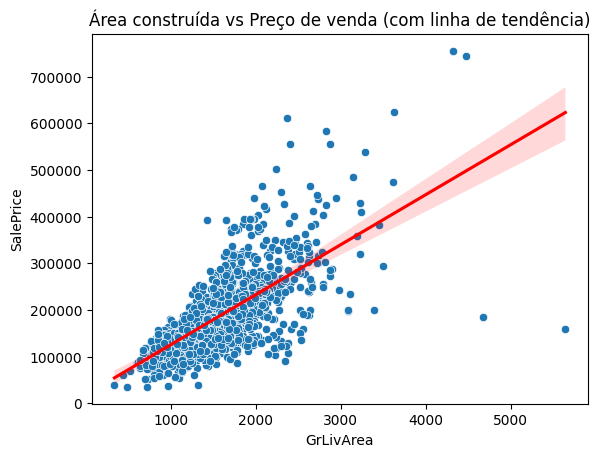

In [52]:
#Existe uma relação linear positiva entre o tamanho da casa e o preço.
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Área construída vs Preço de venda (com linha de tendência)")
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter=False, color='red')


A linha de tendência, quando adicionada ao gráfico de dispersão entre GrLivArea (área construída) e SalePrice (preço de venda), representa a melhor reta que resume a relação entre as duas variáveis. Ela indica a direção geral dos dados e permite visualizar de forma clara que, conforme a área construída aumenta, o preço de venda também tende a crescer. Essa linha é calculada com base em regressão linear e ajuda a identificar padrões, facilitando a previsão de preços. Além disso, ela permite observar se os pontos estão bem distribuídos ao redor dela — o que indica um bom ajuste — ou se há desvios significativos (resíduos), sugerindo a influência de outras variáveis ou a presença de outliers. Em resumo, a linha de tendência serve como um guia visual para entender a força e o tipo de relação entre área e preço no conjunto de dados.

Text(0.5, 1.0, 'Preço por Vizinhança')

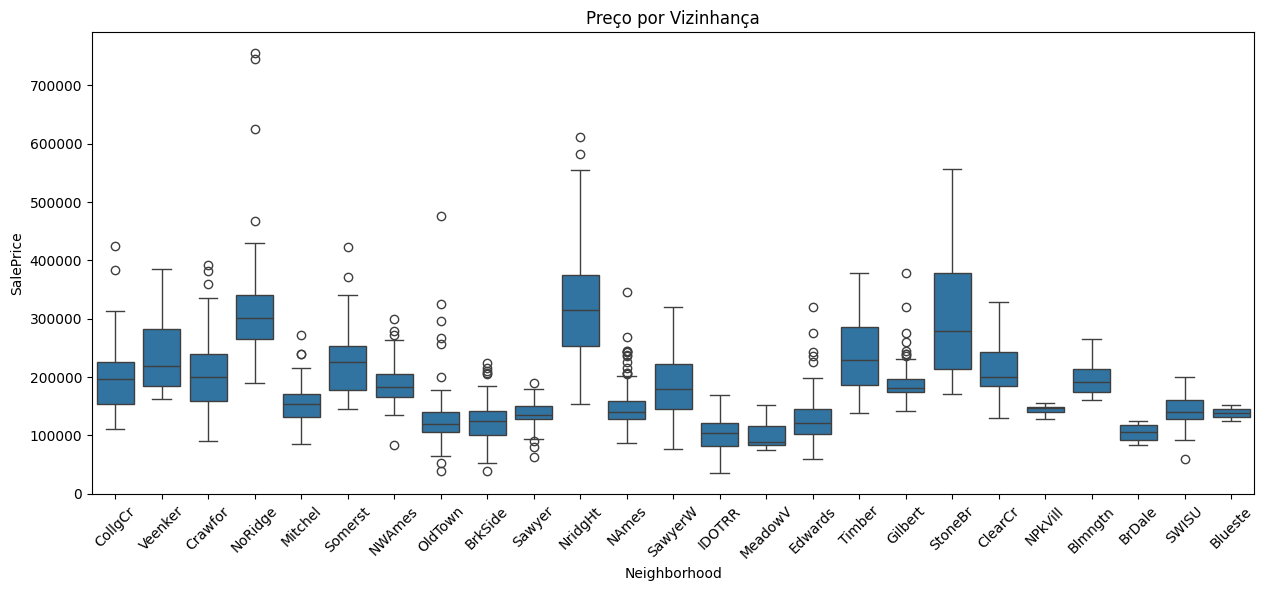

In [53]:
#Casas em determinados bairros têm preços sistematicamente mais altos
plt.figure(figsize=(15,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.xticks(rotation=45)
plt.title('Preço por Vizinhança')


O gráfico apresenta a variação dos preços de venda (SalePrice) das casas em diferentes bairros (Neighborhood) e evidencia como a localização influencia significativamente o valor dos imóveis. Bairros como NoRidge, NridgHt e StoneBr se destacam por possuírem preços medianos mais altos, indicando áreas mais valorizadas, enquanto regiões como IDOTRR e BrDale concentram preços mais baixos. A altura das caixas revela a dispersão dos valores dentro de cada bairro, e os pontos fora delas representam outliers — casas com preços muito acima ou abaixo da média local. Essa visualização destaca que o bairro não apenas afeta o preço médio, mas também a consistência dos valores, sendo uma variável essencial na modelagem preditiva do preço de imóveis.

Text(0.5, 1.0, 'Qualidade Geral vs Preço de Venda')

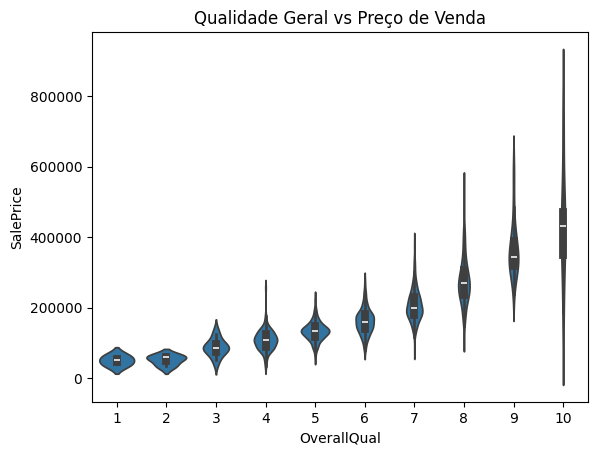

In [54]:
#Casas com melhor qualidade de construção valem mais?
sns.violinplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Qualidade Geral vs Preço de Venda')


O gráfico mostra a relação entre a qualidade geral dos imóveis (OverallQual) e seus preços de venda (SalePrice), revelando uma forte correlação positiva entre essas variáveis. À medida que a nota de qualidade aumenta, observa-se também um aumento consistente no valor dos imóveis, indicando que casas mais bem avaliadas tendem a ser significativamente mais caras. As faixas de qualidade mais baixas (de 1 a 4) concentram-se em preços menores e mais uniformes, enquanto as notas mais altas (principalmente de 8 a 10) apresentam não apenas preços elevados, mas também maior variação, refletindo imóveis de alto padrão com características variadas. A visualização reforça a importância da qualidade geral como um dos principais fatores na definição do valor de mercado de uma casa.

Text(0.5, 1.0, 'Ano de Construção vs Preço de Venda')

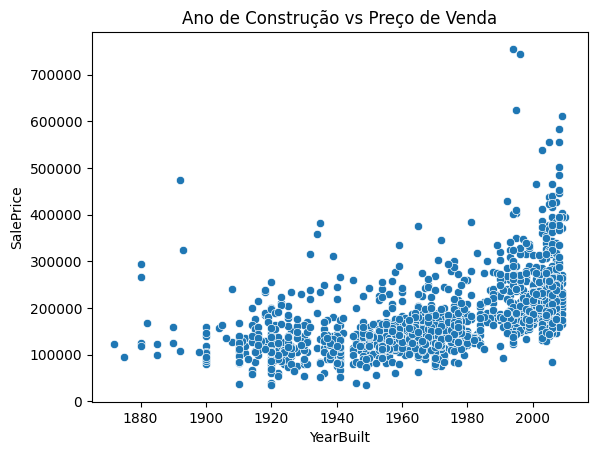

In [55]:
#Casas mais novas tendem a ser mais caras
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
plt.title('Ano de Construção vs Preço de Venda')


O gráfico mostra que há uma relação clara entre o ano de construção dos imóveis (`YearBuilt`) e seus preços de venda (`SalePrice`), indicando que casas mais recentes tendem a ser vendidas por valores mais altos. Observa-se uma concentração de construções após 1950, período em que os preços começam a subir gradualmente, com um aumento mais expressivo a partir dos anos 2000. Imóveis muito antigos, especialmente os construídos antes de 1940, apresentam preços mais baixos e pouca variação, enquanto os mais novos mostram maior dispersão e alguns valores elevados, refletindo construções modernas e de padrão superior. Esses padrões sugerem que o ano de construção é uma variável relevante na previsão do preço de venda.


Text(0.5, 1.0, 'Número de Banheiros Completos vs Preço')

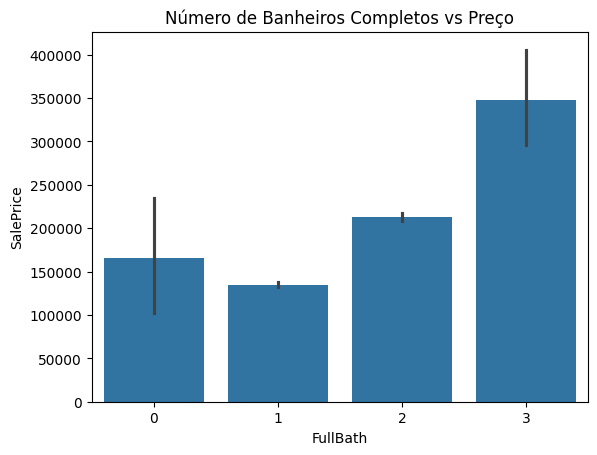

In [56]:
#Mais banheiros significam casas mais valorizadas?
sns.barplot(x='FullBath', y='SalePrice', data=train_data)
plt.title('Número de Banheiros Completos vs Preço')


O gráfico de barras mostra que o número de banheiros completos (`FullBath`) está diretamente relacionado ao preço médio de venda dos imóveis (`SalePrice`). De maneira geral, quanto maior a quantidade de banheiros completos, maior tende a ser o valor da casa, com destaque para imóveis com três banheiros, que apresentam os preços médios mais altos. Casas com dois banheiros também se destacam por estarem acima da média geral, enquanto aquelas com apenas um banheiro têm os menores valores médios. Curiosamente, imóveis com zero banheiros completos possuem preços médios superiores aos de um banheiro, o que pode indicar a presença de banheiros parciais ou outras características específicas nesses imóveis. A tendência crescente reforça que a quantidade de banheiros é um importante indicador de conforto e valorização do imóvel.


Text(0.5, 1.0, 'Capacidade da Garagem vs Preço')

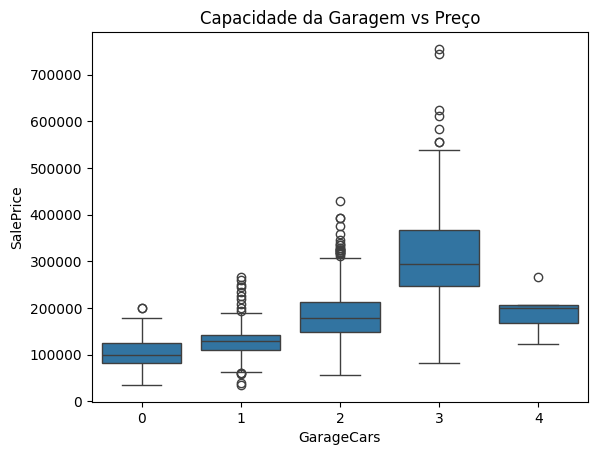

In [57]:
#Casas com garagens maiores são mais caras
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data)
plt.title('Capacidade da Garagem vs Preço')


O gráfico mostra que a capacidade da garagem (`GarageCars`) está relacionada ao preço de venda dos imóveis (`SalePrice`), evidenciando que casas com garagens maiores tendem a ter valores mais altos. Imóveis com capacidade para três carros se destacam com os maiores preços medianos e ampla variação, indicando um padrão de construção mais elevado. Casas com uma ou nenhuma vaga de garagem concentram os preços mais baixos, enquanto aquelas com duas vagas apresentam valores medianos intermediários e mais frequentes. Curiosamente, imóveis com quatro vagas não seguem totalmente essa tendência, com mediana mais baixa, possivelmente devido à baixa quantidade de observações ou influência de outros fatores. De forma geral, a presença e o tamanho da garagem funcionam como um bom indicador do nível de valorização do imóvel.


<Axes: xlabel='SalePrice', ylabel='Count'>

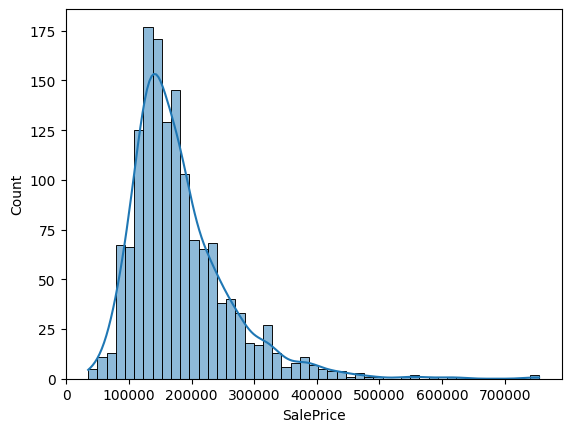

In [58]:
#sns.histplot(df['SalePrice'], kde=True)

sns.histplot(df['SalePrice'], kde=True)


O gráfico de histograma com curva de densidade mostra a distribuição dos preços de venda dos imóveis (`SalePrice`) no conjunto de dados, revelando uma concentração significativa de casas com valores entre 100.000 e 200.000 dólares. A distribuição é assimétrica à direita, com uma cauda longa indicando a presença de imóveis com preços elevados, embora menos frequentes. Esse comportamento sugere que a maioria dos imóveis possui preços acessíveis, enquanto apenas uma pequena parcela corresponde a casas de alto padrão. Essa assimetria é comum em dados financeiros e indica que, para análises estatísticas mais precisas, pode ser vantajoso aplicar transformações como o logaritmo para aproximar a distribuição de uma curva normal.


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

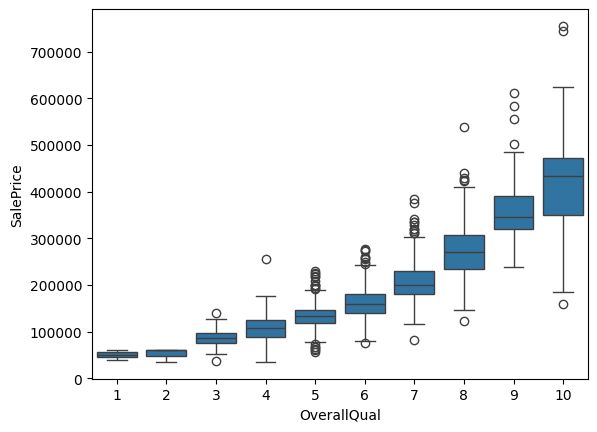

In [59]:
#Casas com maior qualidade de construção têm preços significativamente mais altos.
sns.boxplot(x='OverallQual', y='SalePrice', data=df)


O gráfico evidencia uma relação positiva entre a qualidade geral dos imóveis (`OverallQual`) e seus preços de venda (`SalePrice`), demonstrando que quanto maior a nota de qualidade, maior tende a ser o valor do imóvel. Observa-se um crescimento progressivo nos preços medianos à medida que a qualidade aumenta, com destaque para as casas avaliadas com notas 9 e 10, que apresentam valores significativamente mais altos e grande dispersão. Essa variabilidade nos níveis superiores sugere a presença de imóveis de luxo com características diferenciadas. Já os imóveis com notas entre 5 e 6 concentram a maior parte das observações, indicando que a maioria das casas analisadas possui qualidade intermediária. Essa visualização reforça a importância da qualidade da construção como um dos principais fatores de valorização no mercado imobiliário.


<Axes: >

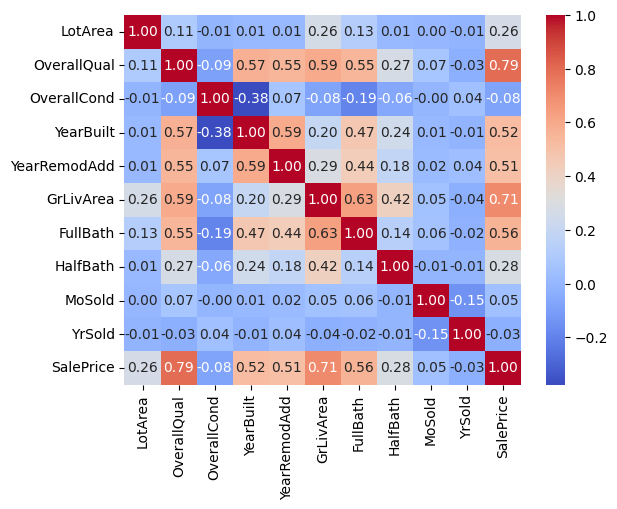

In [60]:
#Algumas variáveis estão altamente correlacionadas com SalePrice.
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")


O mapa de calor apresenta a correlação entre variáveis numéricas do conjunto de dados, destacando aquelas que mais influenciam o preço de venda dos imóveis (`SalePrice`). As variáveis com maior correlação positiva são `OverallQual` (qualidade geral da construção), `GrLivArea` (área útil) e `YearBuilt` (ano de construção), indicando que casas maiores, mais novas e de melhor qualidade tendem a ser mais valorizadas. Já variáveis como `MoSold` (mês de venda) e `YrSold` (ano de venda) apresentam correlação próxima de zero, sugerindo pouca influência no preço final. A análise também revela interdependência entre alguns atributos, como `YearBuilt` e `YearRemodAdd`, o que pode indicar redundância de informação. Esse tipo de visualização é fundamental para orientar a seleção de variáveis em modelos preditivos e entender os fatores mais relevantes para o valor de mercado dos imóveis.


<Axes: >

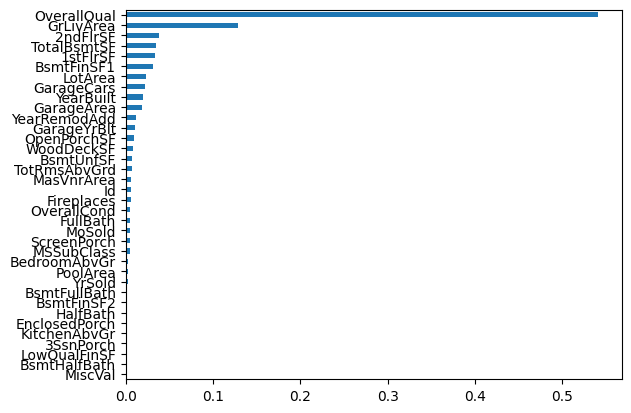

In [61]:
#Algumas variáveis têm impacto muito maior na previsão que outras.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_train, y_train)
pd.Series(model.feature_importances_, index=x_train.columns).sort_values().plot(kind='barh')


O gráfico apresenta a importância das variáveis numéricas na predição do preço de venda dos imóveis (`SalePrice`), revelando que a qualidade geral da construção (`OverallQual`) é, de longe, o fator mais influente no modelo, seguida pela área útil acima do solo (`GrLivArea`) e pela metragem do segundo andar (`2ndFlrSF`). Variáveis relacionadas à estrutura física, como área do porão acabado, número de vagas na garagem e ano de construção, também se destacam como elementos relevantes. Em contrapartida, atributos como número de banheiros no porão, valor de itens diversos (`MiscVal`) e área de acabamento de baixa qualidade possuem influência praticamente nula. Essa análise é essencial para identificar quais características devem ser priorizadas em modelos preditivos e reforça que qualidade e espaço são os principais determinantes do valor de mercado de um imóvel.


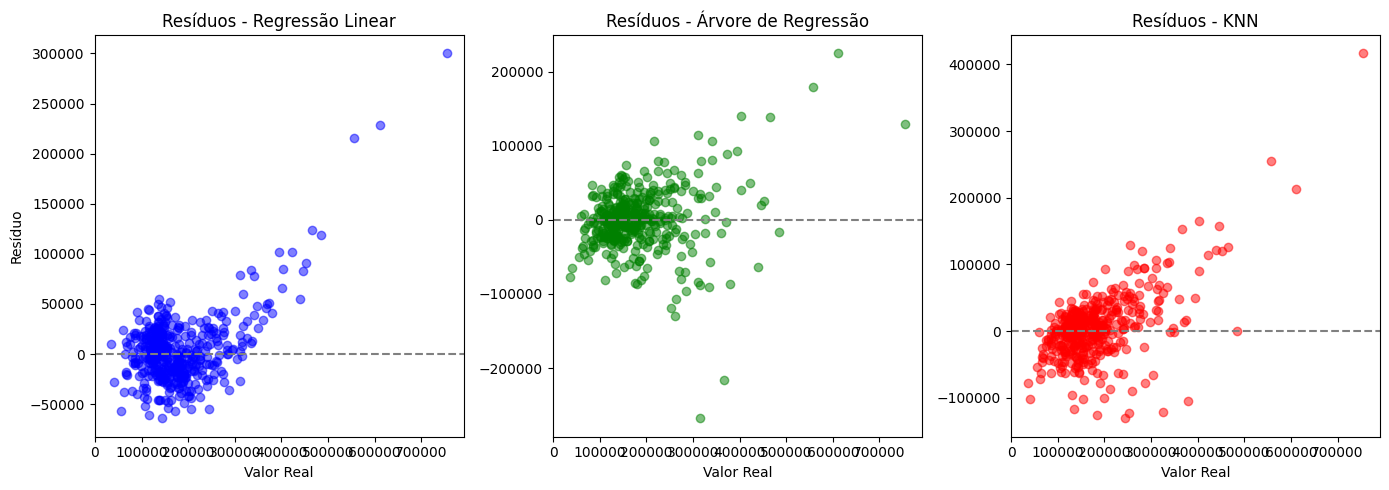

In [74]:

# Fazer previsões
y_rl = reg_rl.predict(x_test)
y_ar = reg_arv.predict(x_test)
y_knn = reg_knn.predict(x_test)

# Calcular resíduos
resid_rl = y_test - y_rl
resid_ar = y_test - y_ar
resid_knn = y_test - y_knn

# Plotar resíduos
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, resid_rl, alpha=0.5, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Resíduos - Regressão Linear")
plt.xlabel("Valor Real")
plt.ylabel("Resíduo")

plt.subplot(1, 3, 2)
plt.scatter(y_test, resid_ar, alpha=0.5, color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Resíduos - Árvore de Regressão")
plt.xlabel("Valor Real")

plt.subplot(1, 3, 3)
plt.scatter(y_test, resid_knn, alpha=0.5, color='red')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Resíduos - KNN")
plt.xlabel("Valor Real")

plt.tight_layout()
plt.show()


O conjunto de gráficos exibe a distribuição dos resíduos para três modelos de regressão — Linear, Árvore de Regressão e KNN — permitindo avaliar o desempenho preditivo de cada um. Observa-se que a Regressão Linear apresenta um padrão de resíduos em forma de funil, indicando que o modelo tende a errar mais à medida que o valor real dos imóveis aumenta. A Árvore de Regressão, por sua vez, concentra melhor os resíduos em torno de zero, mostrando-se mais flexível, embora ainda apresente outliers. Já o modelo KNN demonstra maior dificuldade com imóveis de alto valor, gerando erros expressivos devido à escassez de vizinhos semelhantes para comparação. Em conjunto, os gráficos sugerem que nenhum dos modelos atinge previsões perfeitamente consistentes e que abordagens mais sofisticadas ou ajustes nos dados podem ser necessários para melhorar a precisão.


## Previsão

In [75]:
#Esse código é um exemplo completo de machine learning supervisionado com regressão, usando dados de imóveis para prever o preço de venda de uma casa com base em características fornecidas.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



df = pd.read_csv('train.csv')

# Selecionar features importantes
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'FullBath', 'GarageCars', 'Neighborhood']
target = 'SalePrice'
df = df[features + [target]].dropna()

# Separar em X e y
X = df[features]
y = df[target]

# Pré-processamento
categorical = ['Neighborhood']
numerical = ['GrLivArea', 'OverallQual', 'YearBuilt', 'FullBath', 'GarageCars']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Pipeline com regressão linear
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Treinar modelo
model.fit(X, y)

# ----------------------------
# Entrada interativa do usuário
# ----------------------------

print("\nDigite os dados da casa para prever o preço:")

# Capturar entradas do usuário
grlivarea = float(input("Área útil da casa (em pés quadrados): "))
overallqual = int(input("Qualidade geral da casa (1 a 10): "))
yearbuilt = int(input("Ano de construção: "))
fullbath = int(input("Número de banheiros completos: "))
garagecars = int(input("Número de vagas de garagem: "))
neighborhood = input("Bairro (ex: CollgCr, NridgHt, OldTown...): ")

# Criar DataFrame com os dados
nova_casa = pd.DataFrame([{
    'GrLivArea': grlivarea,
    'OverallQual': overallqual,
    'YearBuilt': yearbuilt,
    'FullBath': fullbath,
    'GarageCars': garagecars,
    'Neighborhood': neighborhood
}])

# Prever preço
preco_previsto = model.predict(nova_casa)
print(f"\n📈 Preço estimado da casa: ${preco_previsto[0]:,.2f}")



Digite os dados da casa para prever o preço:
Área útil da casa (em pés quadrados): 5000
Qualidade geral da casa (1 a 10): 10
Ano de construção: 2025
Número de banheiros completos: 3
Número de vagas de garagem: 4
Bairro (ex: CollgCr, NridgHt, OldTown...): CollgCr

📈 Preço estimado da casa: $482,215.59
